In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [3]:
A = pd.read_csv("/Datasets/Credit.csv")
A = A.drop(A.columns[[0]], axis=1)   
A[1:5]

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 
B = A.apply(le.fit_transform)
B[1:5]

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,1,366,317,219,2,59,10,1,1,1,1,196
2,2,365,328,231,3,48,6,0,0,0,1,126
3,3,388,369,265,2,13,6,1,0,0,1,210
4,4,294,215,143,1,45,11,0,0,1,2,66


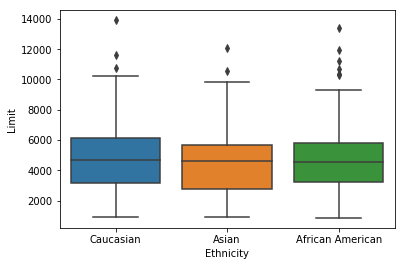

In [5]:
sb.boxplot(y=A.Limit,x=A.Ethnicity)

In [17]:
X = B[B.columns[~B.columns.isin(['Ethnicity'])]]
Y = B[['Ethnicity']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

In [7]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [8]:
X_train

array([[-1.02571454e+00,  1.63451592e+00,  1.69003472e+00, ...,
        -3.27515551e-01,  8.05906034e-01,  1.87600746e+00],
       [-1.16491982e+00,  6.20780778e-01,  1.12725743e+00, ...,
        -3.27515551e-01,  8.05906034e-01,  1.34033719e+00],
       [ 9.24410071e-04,  1.07696159e+00,  1.11832445e+00, ...,
         3.05329013e+00, -1.24083945e+00,  1.76668699e+00],
       ...,
       [-1.70434029e+00,  1.14454394e+00,  1.20765418e+00, ...,
        -3.27515551e-01, -1.24083945e+00,  8.81191251e-01],
       [ 1.40129691e-01,  2.74421271e-01,  4.39418517e-01, ...,
        -3.27515551e-01, -1.24083945e+00,  3.67385078e-01],
       [ 1.07106501e+00,  1.53314241e+00,  1.60963796e+00, ...,
        -3.27515551e-01,  8.05906034e-01,  1.69016267e+00]])

In [15]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=5) 
model.fit(X_train, Y_train) 
predicted = model.predict(X_test)
#X_test['predicted'] = predicted
#X_test['Actual'] = Y_test
cm = confusion_matrix(Y_test, predicted)
#classification_report(Y_test, predicted)
#All Accuracy metrics for Classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 score",f1_score(Y_test,predicted, average="macro"))
print("Precision",precision_score(Y_test,predicted, average="macro"))
print("Recall",recall_score(Y_test,predicted, average="macro"))
print ("Accuracy : ",accuracy_score(Y_test,predicted)*100)

('F1 score', 0.3410208912215704)
('Precision', 0.361068524970964)
('Recall', 0.3510458839406208)
('Accuracy : ', 36.25)


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [1]:
import sklearn.neighbors
dir(sklearn.neighbors)

['BallTree',
 'DistanceMetric',
 'KDTree',
 'KNeighborsClassifier',
 'KNeighborsRegressor',
 'KernelDensity',
 'LSHForest',
 'LocalOutlierFactor',
 'NearestCentroid',
 'NearestNeighbors',
 'RadiusNeighborsClassifier',
 'RadiusNeighborsRegressor',
 'VALID_METRICS',
 'VALID_METRICS_SPARSE',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'approximate',
 'ball_tree',
 'base',
 'classification',
 'dist_metrics',
 'graph',
 'kd_tree',
 'kde',
 'kneighbors_graph',
 'lof',
 'nearest_centroid',
 'radius_neighbors_graph',
 'regression',
 'typedefs',
 'unsupervised']

In [1]:
error = [] # Calculating error for K values between 1 and 40 
for i in range(1, 40): 
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, Y_train) 
    pred_i = knn.predict(X_test) 
    error.append(np.mean(pred_i != Y_test))

NameError: name 'KNeighborsClassifier' is not defined